Mean Squared Error: 2617355857.1081867
R² Score: 0.6330094451221631


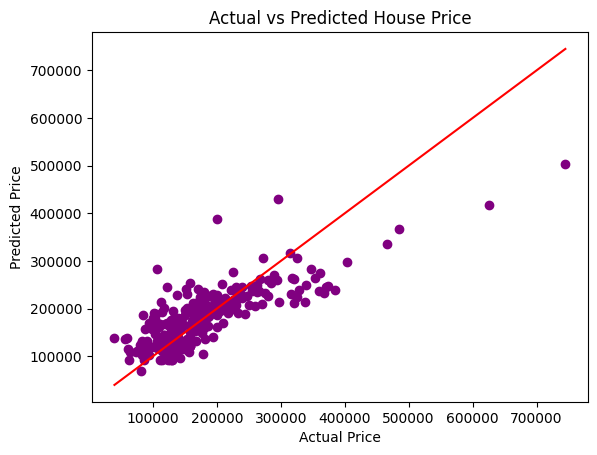

Coefficients:
Area (sqft): 102.91244326929258
Bedrooms: -27104.10410670462
Bathrooms: 34216.1956148406
Intercept: 49683.65428455797


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load data
data = pd.read_csv('/content/train.csv')  # reading the data

# Step 2: Renaming the columns to simple names for better representation
data = data.rename(columns={
    'GrLivArea': 'area',
    'BedroomAbvGr': 'beds',
    'FullBath': 'baths',
    'SalePrice': 'price'
})

# Step 3: Select features and target
X = data[['area', 'beds', 'baths']]  # Features
y = data['price']                   # Target

# Step 4: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 5: Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict house prices
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Step 8: Plot actual vs predicted prices
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect line
plt.show()

# Step 9: Show the effect of each variable
print("Coefficients:")
print(f"Area (sqft): {model.coef_[0]}")
print(f"Bedrooms: {model.coef_[1]}")
print(f"Bathrooms: {model.coef_[2]}")
print("Intercept:", model.intercept_)
